In [1]:
import numpy as np
import random as rd
import pandas as pd
import math
import secrets as st
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

**simulation**

In [2]:
time_step = 1
def initialize() :
    global N, L, x_positions, y_positions, directions, order_parameters
    x_positions = [ [rd.uniform(0, L) for _ in range(N)] ]
    y_positions = [ [rd.uniform(0, L) for _ in range(N)] ]
    directions = [ [rd.uniform(0, 2*np.pi) for _ in range(N)] ]

    #order parameter
    v_xs = np.cos(directions[-1])
    v_ys = np.sin(directions[-1])
    order_parameter = ( np.mean(v_xs)**2 + np.mean(v_ys)**2 )**0.5
    order_parameters = [order_parameter]

def update() :
    global R, v, etta, new_xs, new_ys, new_dirs, order_parameter
    xs = x_positions[-1]
    ys = y_positions[-1]
    v_xs = v*np.cos(directions[-1])
    v_ys = v*np.sin(directions[-1])
    #positions update
    new_xs = [ (xs[n] + time_step*v_xs[n])%L for n in range(N) ]
    new_ys = [ (ys[n] + time_step*v_ys[n])%L for n in range(N) ]
    #direction update
    new_dirs = []
    for n in range(N) :
        n_neighbors_vx = []
        n_neighbors_vy = []
        for j in range(N) :
            dx = min( xs[n]-xs[j], L-(xs[n]-xs[j]) )
            dy = min( ys[n]-ys[j], L-(ys[n]-ys[j]) )
            if (dx**2 + dy**2)**0.5 < R :
                n_neighbors_vx.append(v_xs[j])
                n_neighbors_vy.append(v_ys[j])
        n_neighbors_mean_vx = np.mean(n_neighbors_vx)
        n_neighbors_mean_vy = np.mean(n_neighbors_vy)
        if not n_neighbors_mean_vx == 0 :
          new_dir = math.atan2( n_neighbors_mean_vy, n_neighbors_mean_vx ) + rd.uniform(-etta/2, etta/2)
        new_dirs.append(new_dir)
    #order parameter
    v_xs = np.cos(directions[-1])
    v_ys = np.sin(directions[-1])
    order_parameter = ( np.mean(v_xs)**2 + np.mean(v_ys)**2 )**0.5

def observe() :
  x_positions.append(new_xs)
  y_positions.append(new_ys)
  directions.append(new_dirs)
  order_parameters.append(order_parameter)

**animation**

In [3]:
def animation(sample) :
  fig, ax = plt.subplots()
  ax.set_xlim(0, L)
  ax.set_ylim(0, L)
  quiver = ax.quiver(x_positions[0], y_positions[0],
      np.cos(directions[0]), np.sin(directions[0]),
      color='blue', scale=20, width=0.005)

  def update0(frame):
      quiver.set_offsets(np.column_stack((x_positions[frame], y_positions[frame])))
      quiver.set_UVC(np.cos(directions[frame]), np.sin(directions[frame]))
      return quiver,

  ani = FuncAnimation(fig, update0, frames=T, interval=300, blit=True)
  ax.set_title(f"N={N}   L={L}   v={v}   R={R}   etta={etta}   T={T}")
  ani.save(f"{sample+1} network.mp4")

  fig, ax = plt.subplots()
  ax.set_xlim(0, L)
  ax.set_ylim(0, L)
  quiver = ax.quiver(x_positions[0][individual_particle], y_positions[0][individual_particle],
      np.cos(directions[0][individual_particle]), np.sin(directions[0][individual_particle]),
      color='red', scale=20, width=0.005)

  def update0(frame):
      quiver.set_offsets(np.column_stack((x_positions[frame][individual_particle], y_positions[frame][individual_particle])))
      quiver.set_UVC(np.cos(directions[frame][individual_particle]), np.sin(directions[frame][individual_particle]))
      return quiver,

  ani = FuncAnimation(fig, update0, frames=T, interval=300, blit=True)
  ax.set_title(f"N={N}   L={L}   v={v}   R={R}   T={T}\netta={etta}")
  ani.save(f"{sample+1} individual.mp4")

**runnung**

In [7]:
N = 75
L = 5
v = 0.3
R = 1

def run_simulation() :
  initialize()
  for _ in range(10) :
    update()
    observe()

  length = 10
  while True :
    update()
    observe()
    length+=1
    List = order_parameters[-10:]
    if ( max(List) - min(List) ) < 0.01 or length > 100 :
      break

**data producing**

5000
4999
4998
4997
4996
4995
4994
4993
4992
4991
4990
4989
4988
4987
4986
4985
4984
4983
4982
4981
4980
4979
4978
4977
4976
4975
4974
4973
4972
4971
4970
4969
4968
4967
4966
4965
4964
4963
4962
4961
4960
4959
4958
4957
4956
4955
4954
4953
4952
4951
4950
4949
4948
4947
4946
4945
4944
4943
4942
4941
4940
4939
4938
4937
4936
4935
4934
4933
4932
4931
4930
4929
4928
4927
4926
4925
4924
4923
4922
4921
4920
4919
4918
4917
4916
4915
4914
4913
4912
4911
4910
4909
4908
4907
4906
4905
4904
4903
4902
4901
4900
4899
4898
4897
4896
4895
4894
4893
4892
4891
4890
4889
4888
4887
4886
4885
4884
4883
4882
4881
4880
4879
4878
4877
4876
4875
4874
4873
4872
4871
4870
4869
4868
4867
4866
4865
4864
4863
4862
4861
4860
4859
4858
4857
4856
4855
4854
4853
4852
4851
4850
4849
4848
4847
4846
4845
4844
4843
4842
4841
4840
4839
4838
4837
4836
4835
4834
4833
4832
4831
4830
4829
4828
4827
4826
4825
4824
4823
4822
4821
4820
4819
4818
4817
4816
4815
4814
4813
4812
4811
4810
4809
4808
4807
4806
4805
4804
4803
4802
4801


<ipython-input-3-4fd8411e59fd>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


2000
1999
1998
1997
1996
1995
1994
1993
1992
1991
1990
1989
1988
1987
1986
1985
1984
1983
1982
1981
1980
1979
1978
1977
1976
1975
1974
1973
1972
1971
1970
1969
1968
1967
1966
1965
1964
1963
1962
1961
1960
1959
1958
1957
1956
1955
1954
1953
1952
1951
1950
1949
1948
1947
1946
1945
1944
1943
1942
1941
1940
1939
1938
1937
1936
1935
1934
1933
1932
1931
1930
1929
1928
1927
1926
1925
1924
1923
1922
1921
1920
1919
1918
1917
1916
1915
1914
1913
1912
1911
1910
1909
1908
1907
1906
1905
1904
1903
1902
1901
1900
1899
1898
1897
1896
1895
1894
1893
1892
1891
1890
1889
1888
1887
1886
1885
1884
1883
1882
1881
1880
1879
1878
1877
1876
1875
1874
1873
1872
1871
1870
1869
1868
1867
1866
1865
1864
1863
1862
1861
1860
1859
1858
1857
1856
1855
1854
1853
1852
1851
1850
1849
1848
1847
1846
1845
1844
1843
1842
1841
1840
1839
1838
1837
1836
1835
1834
1833
1832
1831
1830
1829
1828
1827
1826
1825
1824
1823
1822
1821
1820
1819
1818
1817
1816
1815
1814
1813
1812
1811
1810
1809
1808
1807
1806
1805
1804
1803
1802
1801


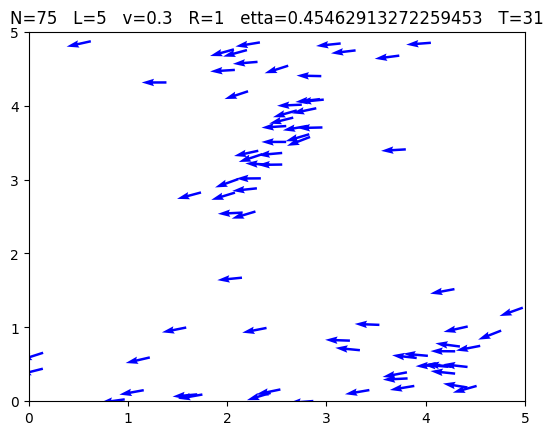

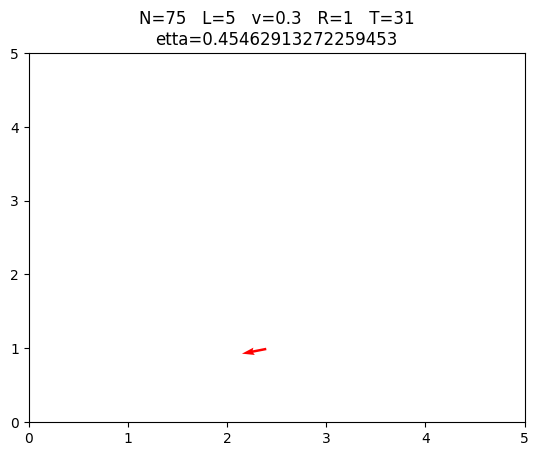

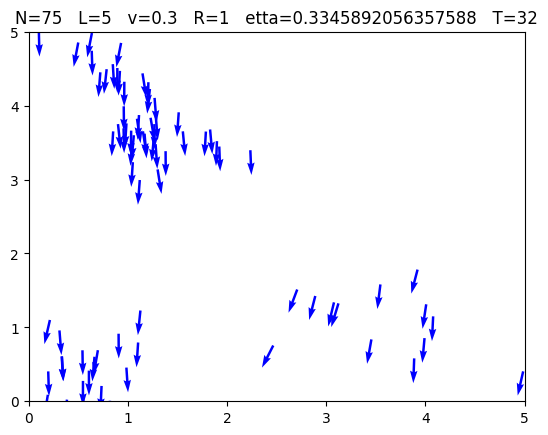

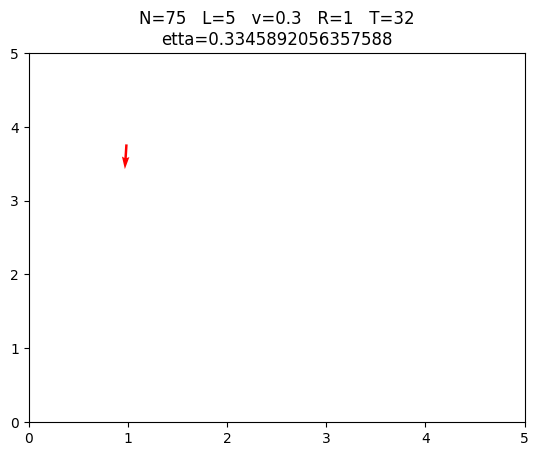

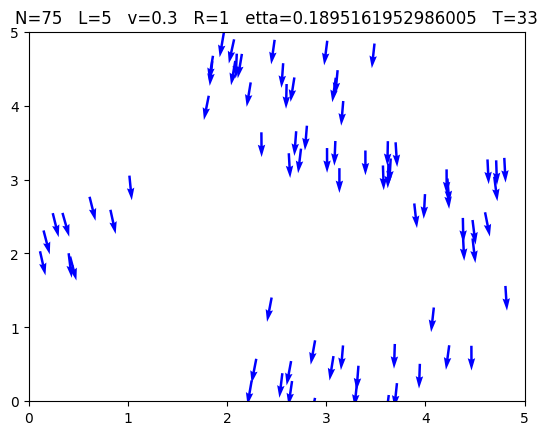

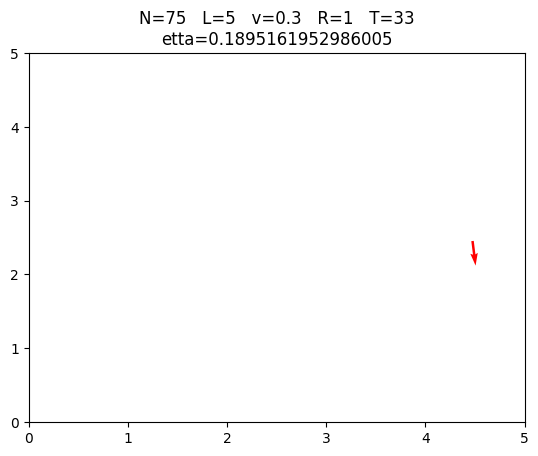

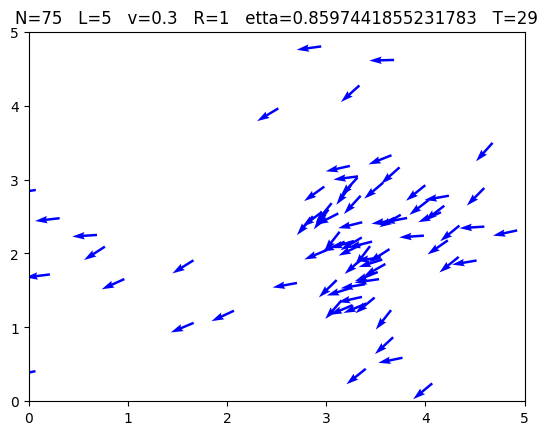

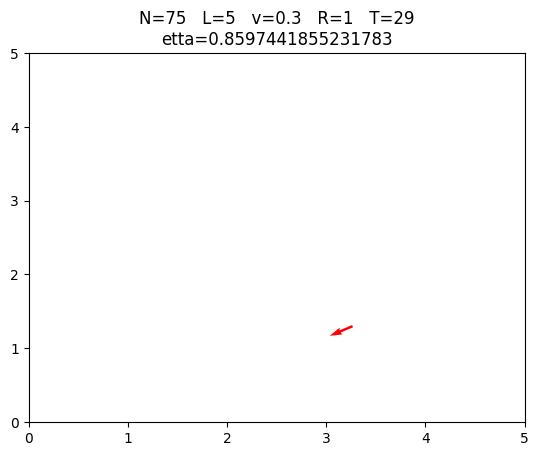

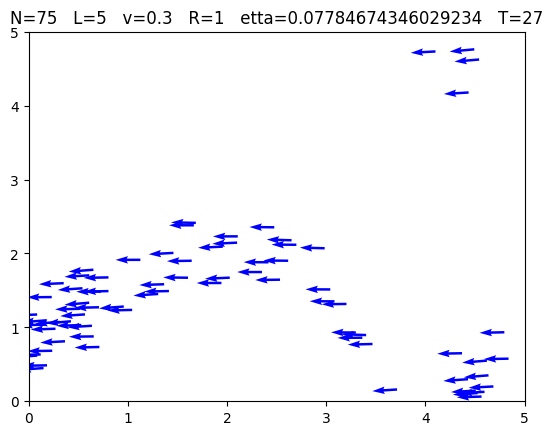

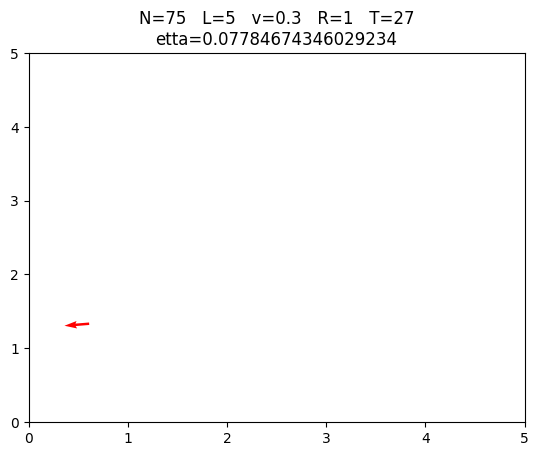

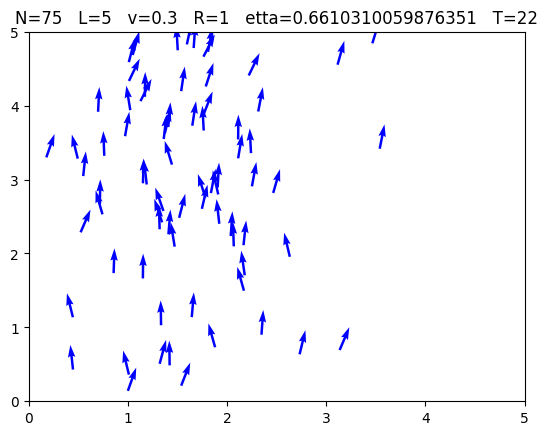

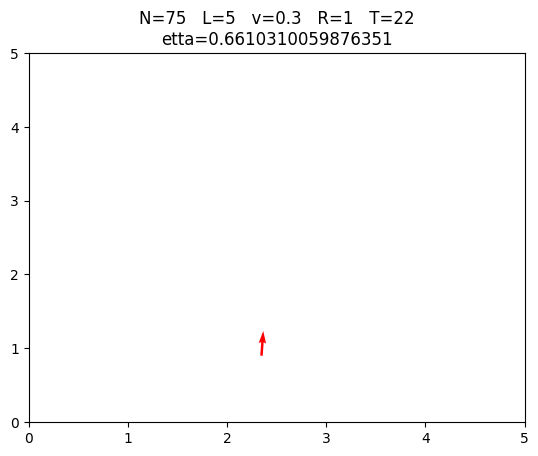

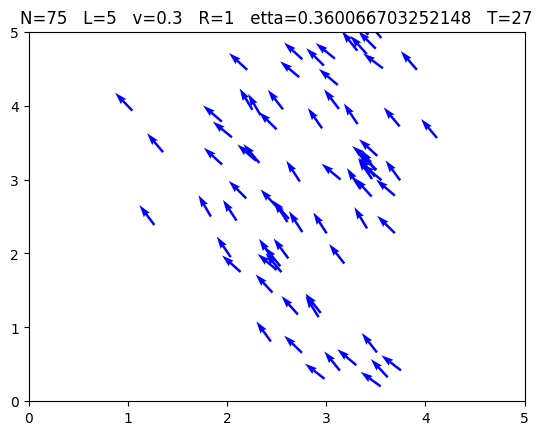

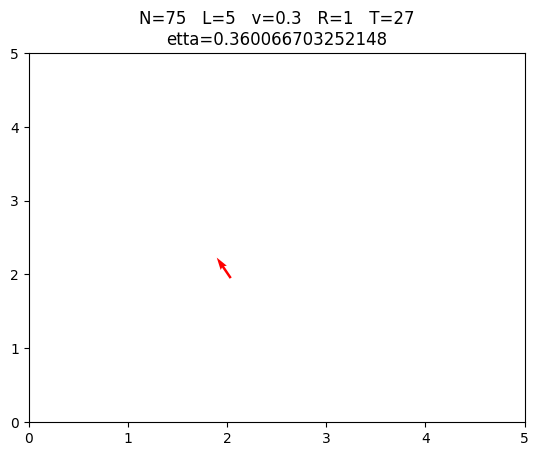

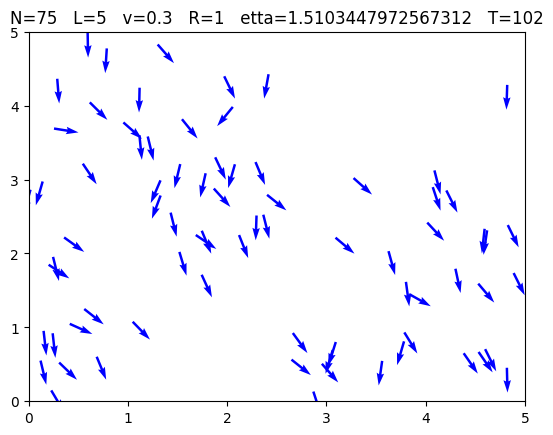

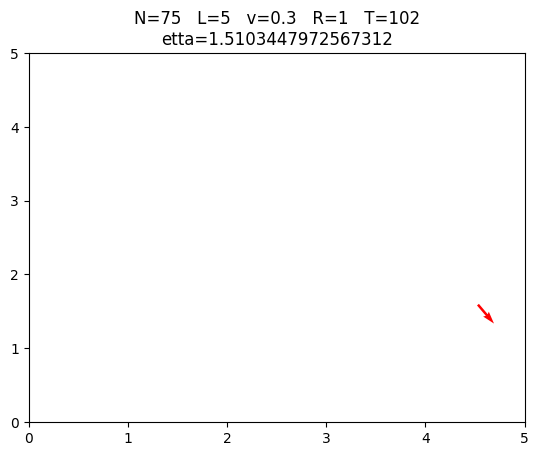

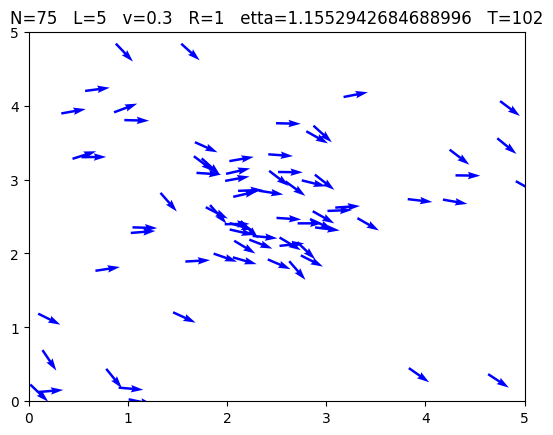

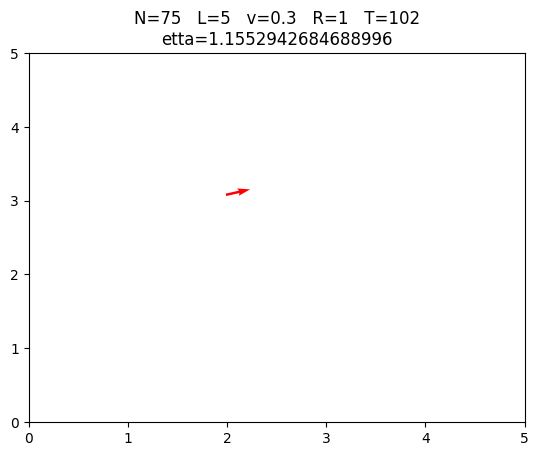

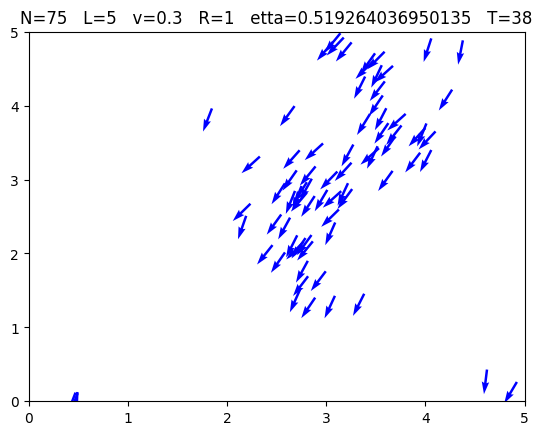

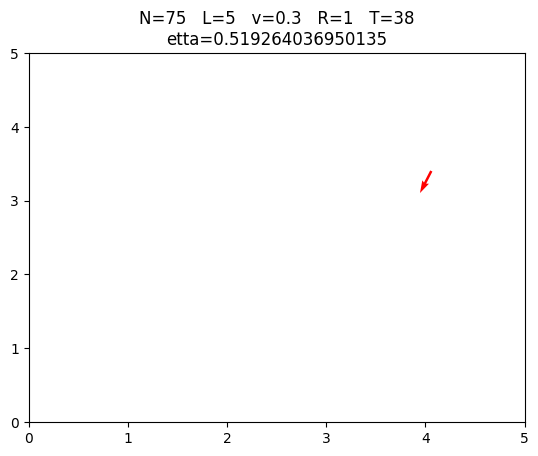

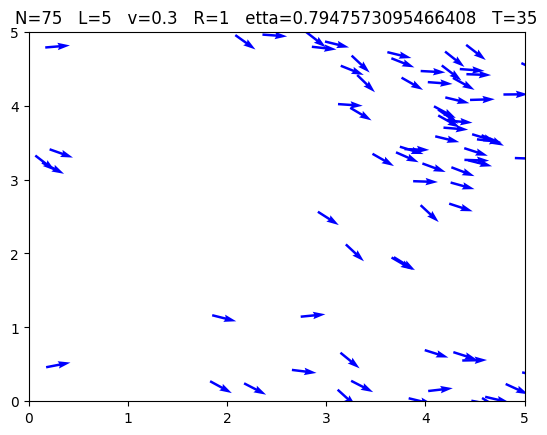

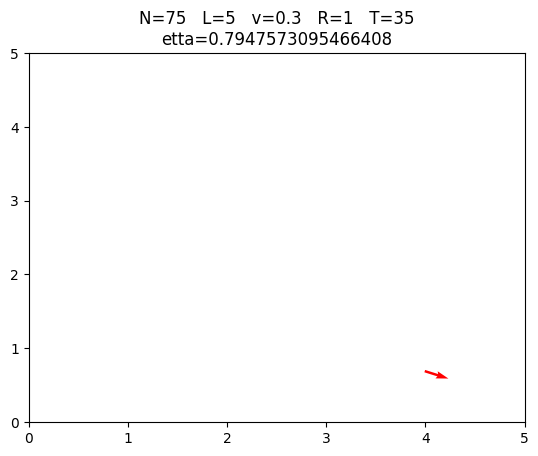

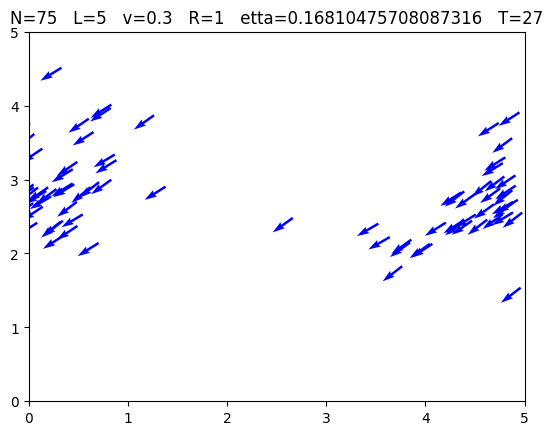

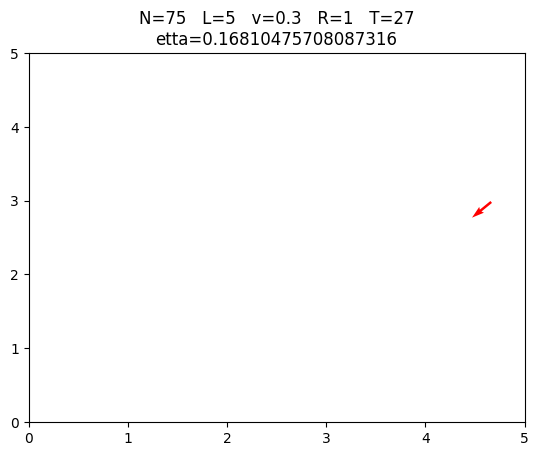

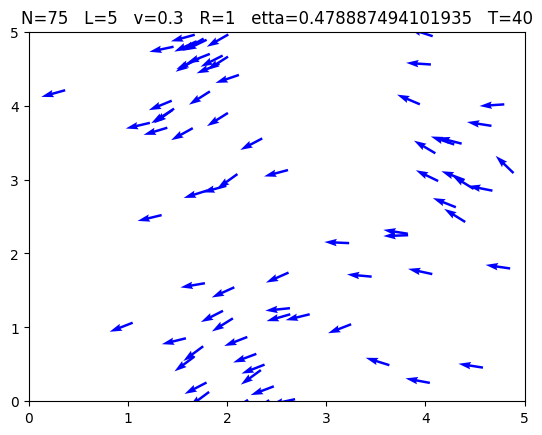

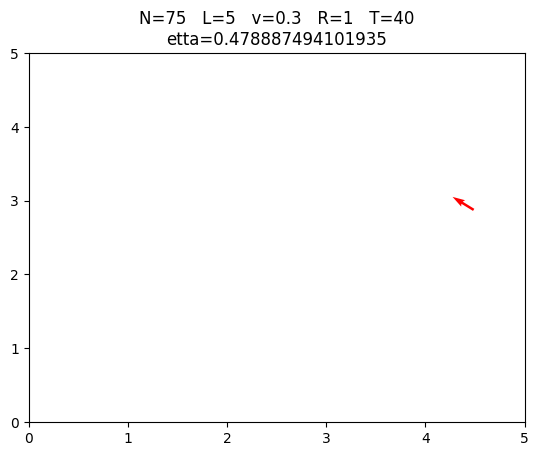

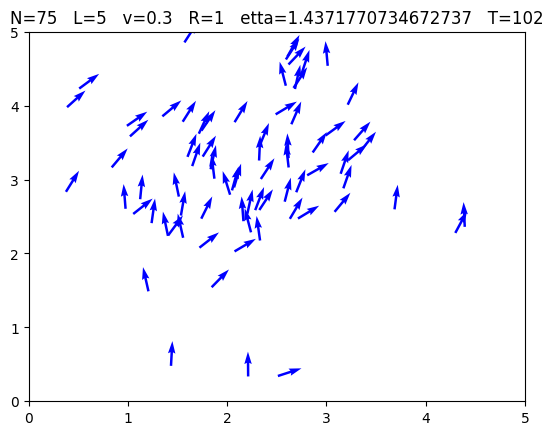

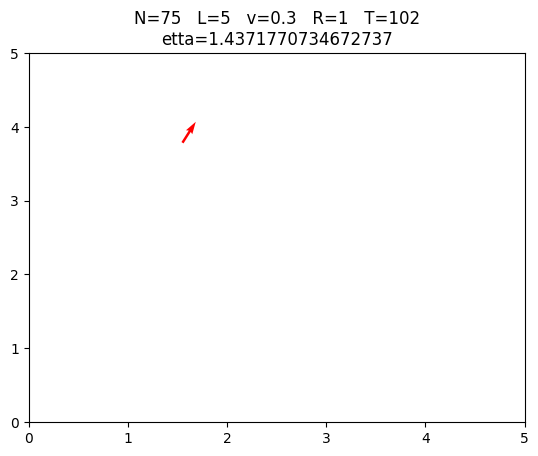

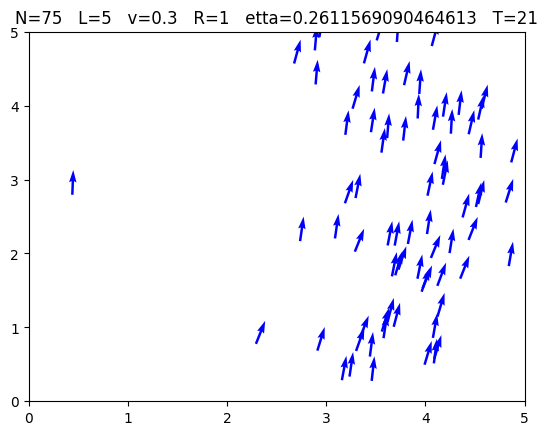

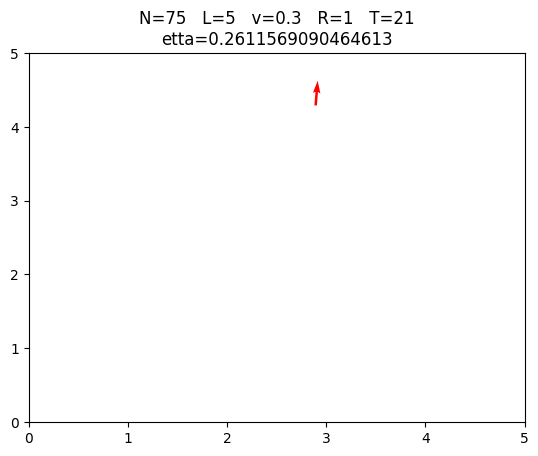

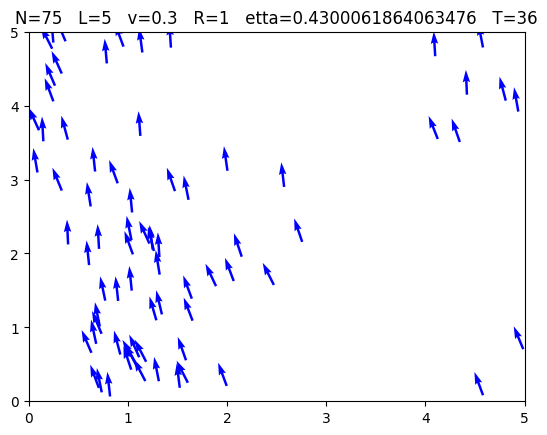

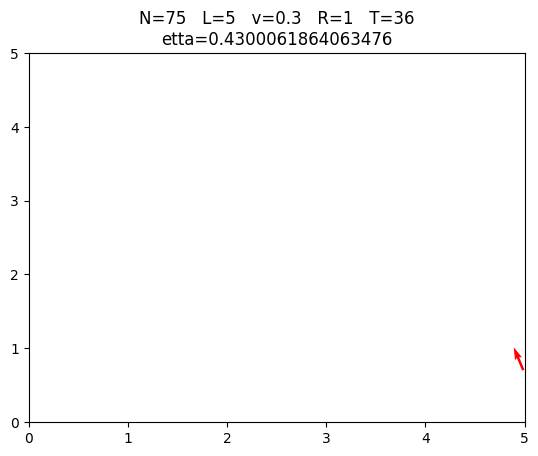

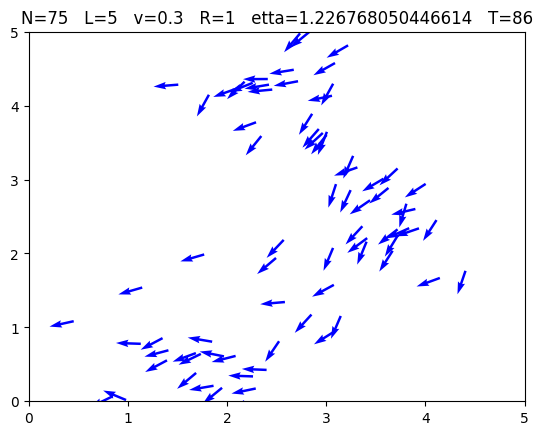

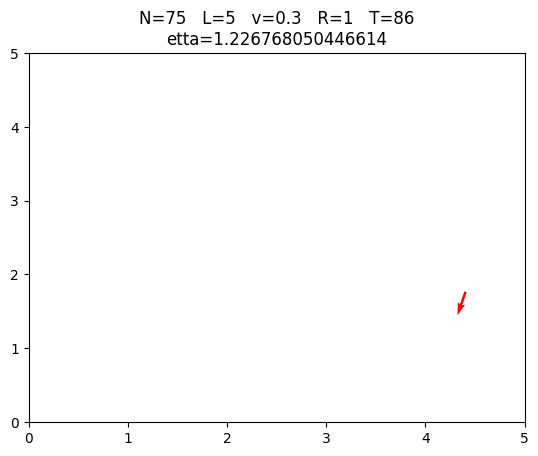

In [8]:
n_samples = 5000
count = n_samples
dataset = []
for sample in range(n_samples) :
  etta = rd.uniform(0, np.pi/2)
  run_simulation()
  T = len(order_parameters)
  individual_particle = rd.randint(0, N-1)
  individuals_dirs = [ i[individual_particle] for i in directions ]
  data = [T, order_parameters[-1], individuals_dirs, order_parameters, np.mean( directions[-1] ), etta]
  dataset.append(data)
  if sample%300 == 0 :
    animation(sample)
  print(count)
  count-=1

In [9]:
df = pd.DataFrame(dataset, columns=["T", "final order parameter", "individuals dirs", "order parameter list","net coll dir", "etta"])
df.to_parquet("dataset.parquet")